**Neural Networks for Handwritten Digit Recognition(0-9), Multiclass classification**

In [ ]:
!pip install ipympl

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/Multi_Classification_project')

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid

import matplotlib.pyplot as plt
#%matplotlib Widget
plt.style.use('/content/drive/MyDrive/Colab Notebooks/Multi_Classification_project/deeplearning.mplstyle')

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

from public_tests import*

from autils import*
from lab_utils_softmax import plt_softmax
np.set_printoptions(precision=2)

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
X = np.load('/content/drive/MyDrive/Colab Notebooks/Multi_Classification_project/data/X.npy')
y = np.load('/content/drive/MyDrive/Colab Notebooks/Multi_Classification_project/data/y.npy')

In [ ]:
print('The first element of X is : ', X[0])

The first element of X is :  [ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  8.56e-06  1.94e-06 -7.37e-04
 -8.13e-03 -1.86e-02 -1.87e-02 -1.88e-02 -1.91e-02 -1.64e-02 -3.78e-03
  3.30e-04  1.28e-05  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  1.16e-04  1.20e-04 -1.40e-02 -2.85e-02  8.04e-02
  2.67e-01  2.74e-01  2.79e-01  2.74e-01  2.25e-

In [ ]:
print('The first element of y is : ', y[0,0])
print('The last element of y is  : ', y[-1,0])

The first element of y is :  0
The last element of y is  :  9


In [ ]:
# view dimensions
print('The shape of X is : ', (X.shape))
print('The shape of y is : ', (y.shape))

The shape of X is :  (5000, 400)
The shape of y is :  (5000, 1)


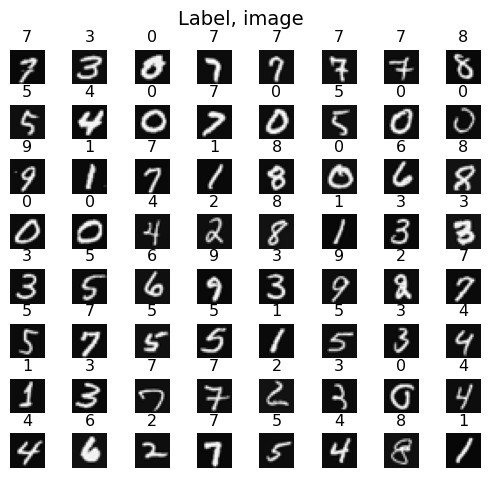

In [ ]:
# visualize data
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m,n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13, rect=[0, 0.03, 1, 0.91])  #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):

  # Select random indices
  random_index = np.random.randint(m)

  # Select rows corresponding to the random indices and
  # reshape the image
  X_random_reshaped = X[random_index].reshape((20,20)).T

  #display the image
  ax.imshow(X_random_reshaped, cmap='gray')

  # display the label above the image
  ax.set_title(y[random_index,0])
  ax.set_axis_off()
  fig.suptitle("Label, image", fontsize=14)


In [ ]:
# numerical stability is improved if the softmax is grouped with the loss function rather than the output layer.

In [ ]:
# model implementation

tf.random.set_seed(1234)  # for consistent results
model = Sequential(
   [
      tf.keras.Input(shape=(400,)),
      Dense(units=25, activation='relu', name='L1'),
      Dense(units=15, activation='relu', name='L2'),
      Dense(units=10, activation='linear', name='L3'),  # linear means no activation in o/p layer
   ], name = "my_model"

)

In [ ]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 25)                10025     
                                                                 
 L2 (Dense)                  (None, 15)                390       
                                                                 
 L3 (Dense)                  (None, 10)                160       
                                                                 
Total params: 10575 (41.31 KB)
Trainable params: 10575 (41.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# target is the expected digit, 0-9, hence use SparseCategoricalCrossentropy
# "from_logits=True" : indicate the softmax should be included with the loss calculation.
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
)

In [ ]:
history = model.fit(
    X,y,
    epochs = 40
)

# in here shown epochs.
# The default size of a batch in Tensorflow is 32.
# there are 5000 examples in the data set.hence there are roughly 157 batches.
# notation of 157/157 is describing which batch has been executed.

Epoch 1/40
157/157 [==============================] - 3s 6ms/step - loss: 1.3953
Epoch 2/40
157/157 [==============================] - 1s 4ms/step - loss: 0.5558
Epoch 3/40
157/157 [==============================] - 1s 4ms/step - loss: 0.4122
Epoch 4/40
157/157 [==============================] - 1s 4ms/step - loss: 0.3476
Epoch 5/40
157/157 [==============================] - 1s 6ms/step - loss: 0.3100
Epoch 6/40
157/157 [==============================] - 1s 4ms/step - loss: 0.2835
Epoch 7/40
157/157 [==============================] - 1s 4ms/step - loss: 0.2583
Epoch 8/40
157/157 [==============================] - 1s 6ms/step - loss: 0.2400
Epoch 9/40
157/157 [==============================] - 1s 4ms/step - loss: 0.2255
Epoch 10/40
157/157 [==============================] - 0s 2ms/step - loss: 0.2057
Epoch 11/40
157/157 [==============================] - 0s 2ms/step - loss: 0.1949
Epoch 12/40
157/157 [==============================] - 0s 2ms/step - loss: 0.1865
Epoch 13/40
157/157 [====

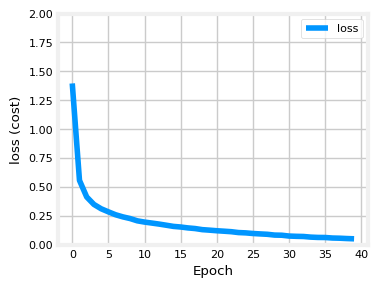

In [ ]:
plot_loss_tf(history)

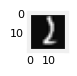

1/1 [==============================] - 0s 93ms/step
predicting a Two :  
[[-11.9    1.16   3.92  -0.07  -8.78  -7.09  -4.74  -0.25  -3.53  -5.02]]
Largest Prediction index: 2


In [ ]:
# prediction
# np.argmax : use to select the largest output prediction
# if problem requires a selection we can use numpy argmax.

image_of_two = X[1015]
display_digit(image_of_two)

prediction = model.predict(image_of_two.reshape(1,400))

print(f"predicting a Two :  \n{prediction}")
print(f"Largest Prediction index: {np.argmax(prediction)}")

In [ ]:
# if problem requires probability, we should use softmax.

prediction_p = tf.nn.softmax(prediction)

print(f"Predicting a Two. probability vector: \n{prediction_p}")
print(f"Total of predictons : {np.sum(prediction_p) : 0.3f}")

Predicting a Two. probability vector: 
[[1.23e-07 5.76e-02 9.11e-01 1.69e-02 2.79e-06 1.50e-05 1.58e-04 1.41e-02
  5.33e-04 1.20e-04]]
Total of predictons :  1.000


In [ ]:
# To return an integer representing the predicted target, you want the index of the largest probability

yhat = np.argmax(prediction_p)
print(f"np.argmax(prediction_p) : {yhat}")


np.argmax(prediction_p) : 2


1/1 [==============================] - 0s 35ms/step


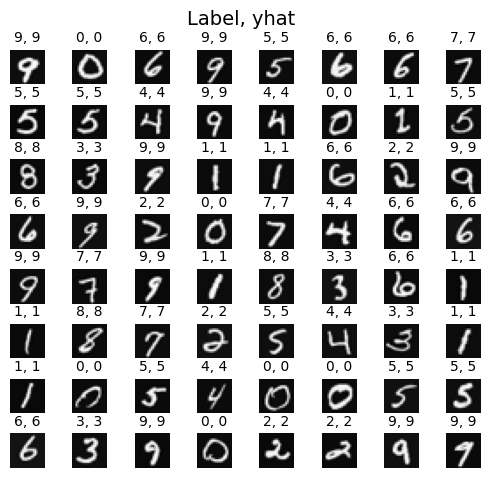

In [ ]:
# compare the predictions vs the labels for a random sample of 64 digits

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m,n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91])

for i,ax in enumerate(axes.flat):
  random_index = np.random.randint(m)

  # Select rows corresponding to the random indices and
  # reshape the image
  X_random_reshaped = X[random_index].reshape((20,20)).T

  # display the image
  ax.imshow(X_random_reshaped, cmap='gray')

  # predict using the Neural Network
  prediction = model.predict(X[random_index].reshape(1,400))
  prediction_p = tf.nn.softmax(prediction)
  yhat = np.argmax(prediction_p)


  # display the label above the image
  ax.set_title(f"{y[random_index,0]}, {yhat}", fontsize=10)
  ax.set_axis_off()

fig.suptitle("Label, yhat", fontsize=14)
plt.show()

1/1 [==============================] - 0s 21ms/step
44 errors out of 5000 images


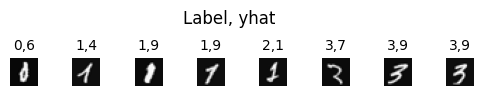

In [ ]:
print(f"{display_errors(model,X,y)} errors out of {len(X)} images")